In [2]:
from copulas.datasets import sample_univariate_beta
data = sample_univariate_beta()

In [3]:
data.head()

0    4.796025
1    4.935189
2    4.637677
3    4.945320
4    4.726815
dtype: float64

<AxesSubplot:>

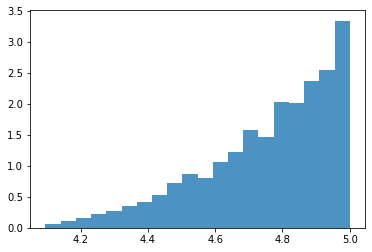

In [5]:
%matplotlib inline
from copulas.visualization import hist_1d
hist_1d(data)

In [6]:
from copulas.univariate import BetaUnivariate

beta = BetaUnivariate()
beta.fit(data)

In [7]:
beta._params

{'loc': 4.095558923695414,
 'scale': 0.9044258869808379,
 'a': 2.552323190906778,
 'b': 0.9041091899047313}

In [8]:
sampled = beta.sample(1000)

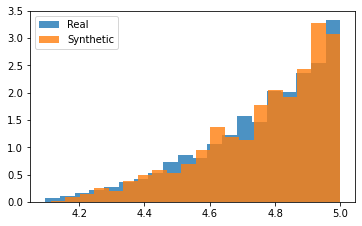

In [9]:
from copulas.visualization import compare_1d
compare_1d(data, sampled)